###  Created by Luis Alejandro (alejand@umich.edu)

In [1]:
import tensorflow as tf
import numpy as np
from utils import unicode_to_ascii
from dataset import DatasetBuilder
from attention_translation import preprocess
from attention_translation import Translator
from attention_translation import plot_attention
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# GPU?
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Creates dataset for training
files = ['../../datasets/nlp/english-spanish.txt']
builder = DatasetBuilder(files, preprocessors=(preprocess,preprocess), batch_size=64, max_obs=40000, test_obs=20)
train_dataset, test_dataset = builder.build()

In [4]:
# Load embedding matrix (glove vectors) -> these will only be used for English (source/input)
embedding_size = 100
word_to_vector = {}
with open('../../datasets/glove.6B/glove.6B.%sd.txt' % embedding_size, encoding='utf8') as file:
    for line in file:
        values = line.split()
        word = unicode_to_ascii(values[0])
        vector = np.asarray(values[1:],dtype=np.float32)
        word_to_vector[word] = vector
        
embedding_vectors = np.zeros((len(builder.source_tokenizer.word_to_index), embedding_size))
for word, index in builder.source_tokenizer.word_to_index.items():
    if word.decode() in word_to_vector:
        embedding_vectors[index,:] = word_to_vector[word.decode()]

In [5]:
# Defining model
translator = Translator(builder.source_tokenizer,
                        builder.target_tokenizer,
                        source_embedding_matrix=embedding_vectors,
                        target_embedding_size=embedding_size,
                        max_output_length=builder.target_tokenizer.max_seq,
                        attention_size=512,
                        restore=True, 
                        masking=False)

In [6]:
# Training model
translator.train(10, train_dataset, test_dataset)

Epoch 1 out of 10 complete (96.39 secs) -- Train Loss: 2084.9194 -- Train Acc: 0.70 -- Test Loss: 522.1699 -- Test Acc: 0.76
Epoch 2 out of 10 complete (34.16 secs) -- Train Loss: 1507.8549 -- Train Acc: 0.77 -- Test Loss: 449.0630 -- Test Acc: 0.77
Epoch 3 out of 10 complete (33.58 secs) -- Train Loss: 1273.7054 -- Train Acc: 0.80 -- Test Loss: 384.9327 -- Test Acc: 0.80
Epoch 4 out of 10 complete (34.01 secs) -- Train Loss: 1084.7614 -- Train Acc: 0.82 -- Test Loss: 333.8947 -- Test Acc: 0.81
Epoch 5 out of 10 complete (34.00 secs) -- Train Loss: 932.2297 -- Train Acc: 0.83 -- Test Loss: 291.7671 -- Test Acc: 0.83
Epoch 6 out of 10 complete (33.85 secs) -- Train Loss: 798.1078 -- Train Acc: 0.85 -- Test Loss: 260.3412 -- Test Acc: 0.86
Epoch 7 out of 10 complete (33.79 secs) -- Train Loss: 682.8798 -- Train Acc: 0.87 -- Test Loss: 234.1190 -- Test Acc: 0.86
Epoch 8 out of 10 complete (33.33 secs) -- Train Loss: 585.0228 -- Train Acc: 0.88 -- Test Loss: 220.2308 -- Test Acc: 0.86
Epoc

Expected: come algo .
Translation: come algo .



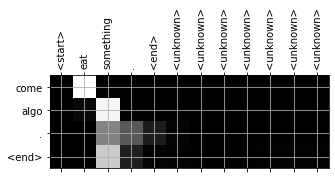

Expected: tom golpeo a la puerta .
Translation: tom se subio al ascensor .



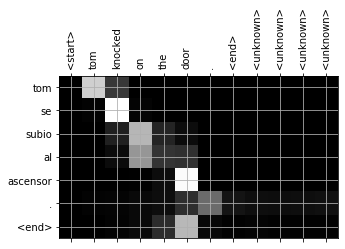

Expected: prometo que no voy a decir .
Translation: yo no le he visto a tom .



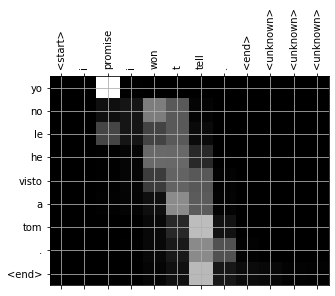

Expected: he dejado de beber cerveza .
Translation: me he bebido leche .



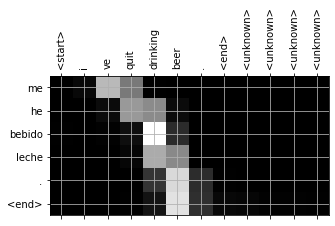

Expected: tengo mi propio asistente .
Translation: tengo mi propio asistente .



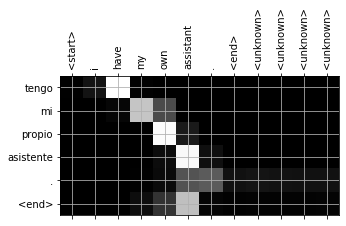

Expected: te llamare manana .
Translation: te llamare manana .



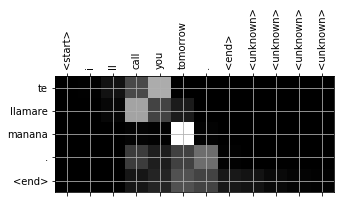

Expected: veo al nino .
Translation: veo a la chica .



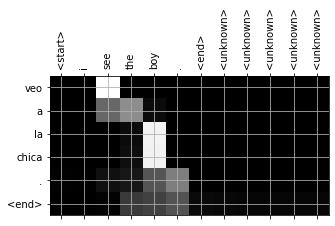

Expected: el se bebio una cerveza .
Translation: el bebio un cerveza .



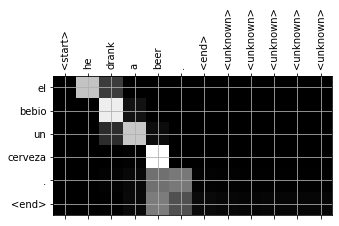

Expected: come sano .
Translation: come sano .



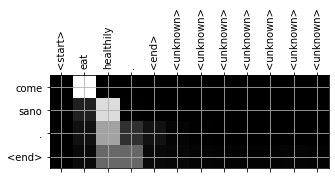

Expected: todo el mundo piensa de esa forma .
Translation: todos todos lo sabe .



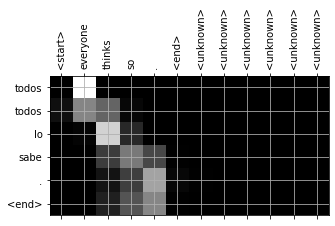

Expected: dios siempre tiene la razon .
Translation: dios es muy bien .



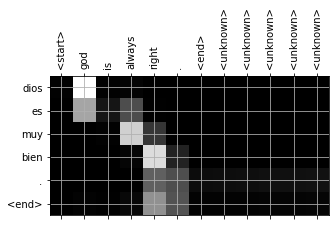

Expected: vayase .
Translation: vete a otro .



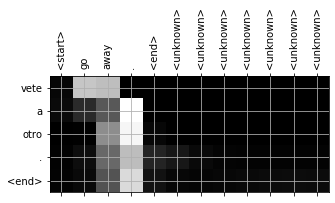

Expected: es muy amargo .
Translation: es muy frio .



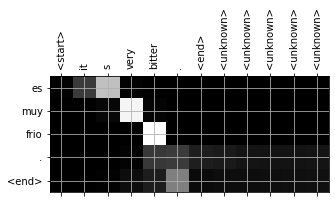

Expected: soy un traductor .
Translation: soy un musico .



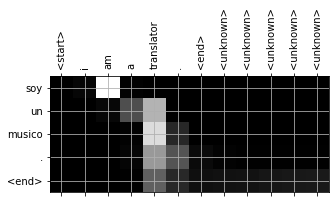

Expected: las termitas comen madera .
Translation: come como la fruta .



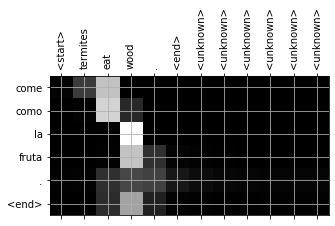

Expected: realmente recuerdo eso .
Translation: yo lo dije .



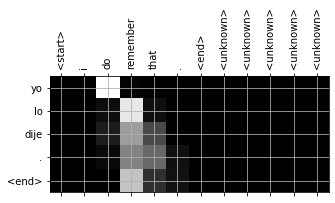

Expected: te llamare .
Translation: te llamo .



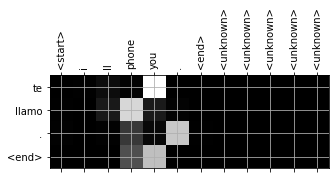

Expected: nos encontramos hoy .
Translation: nos conocimos hoy .



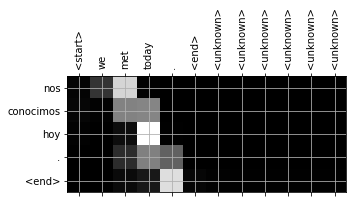

Expected: ¿ como pudo ocurrir eso ?
Translation: ¿ como puede eso ?



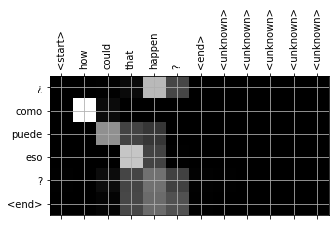

Expected: esto es solo agua .
Translation: esto es solo agua .



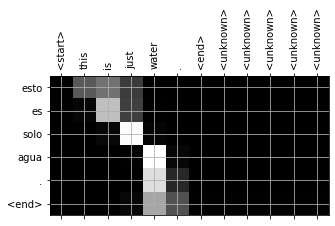

In [7]:
# Test model
translator.evaluate(test_dataset)

In [8]:
# Training model
translator.train(10, train_dataset, test_dataset)

Epoch 1 out of 10 complete (33.54 secs) -- Train Loss: 372.9738 -- Train Acc: 0.91 -- Test Loss: 183.3627 -- Test Acc: 0.87
Epoch 2 out of 10 complete (34.35 secs) -- Train Loss: 324.9141 -- Train Acc: 0.92 -- Test Loss: 176.0958 -- Test Acc: 0.88
Epoch 3 out of 10 complete (33.69 secs) -- Train Loss: 285.6901 -- Train Acc: 0.93 -- Test Loss: 173.5133 -- Test Acc: 0.88
Epoch 4 out of 10 complete (33.02 secs) -- Train Loss: 255.0124 -- Train Acc: 0.94 -- Test Loss: 176.3602 -- Test Acc: 0.87
Epoch 5 out of 10 complete (33.06 secs) -- Train Loss: 229.2610 -- Train Acc: 0.94 -- Test Loss: 165.4926 -- Test Acc: 0.88
Epoch 6 out of 10 complete (33.13 secs) -- Train Loss: 208.4585 -- Train Acc: 0.95 -- Test Loss: 169.4260 -- Test Acc: 0.88
Epoch 7 out of 10 complete (33.43 secs) -- Train Loss: 190.4689 -- Train Acc: 0.95 -- Test Loss: 173.7654 -- Test Acc: 0.88
Epoch 8 out of 10 complete (33.94 secs) -- Train Loss: 174.5926 -- Train Acc: 0.95 -- Test Loss: 180.2458 -- Test Acc: 0.88
Epoch 9 

Expected: come algo .
Translation: comanse algo .



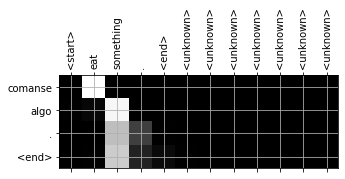

Expected: tom golpeo a la puerta .
Translation: tom golpeo la puerta .



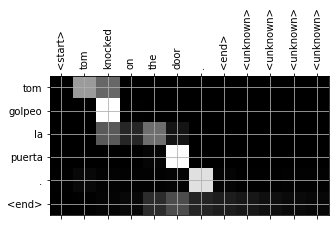

Expected: prometo que no voy a decir .
Translation: prometo que no lo dire .



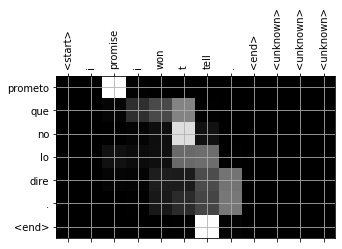

Expected: he dejado de beber cerveza .
Translation: me he bebido de leche .



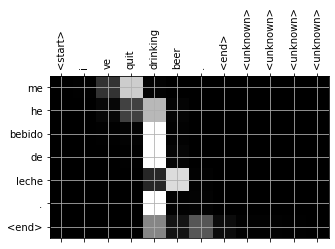

Expected: tengo mi propio asistente .
Translation: tengo mi propio asistente .



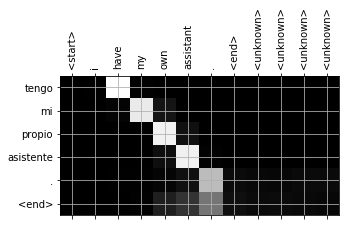

Expected: te llamare manana .
Translation: te llamo manana .



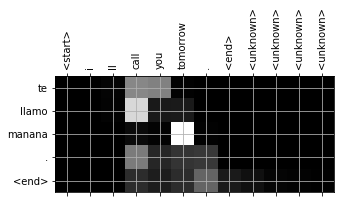

Expected: veo al nino .
Translation: veo a la chica .



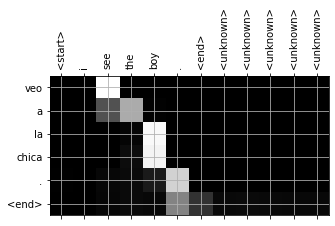

Expected: el se bebio una cerveza .
Translation: el bebio un cerveza .



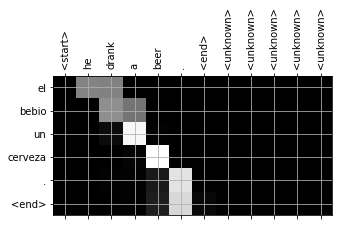

Expected: come sano .
Translation: coman sano .



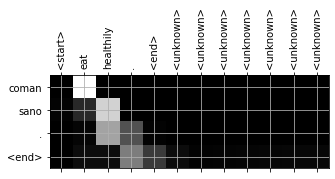

Expected: todo el mundo piensa de esa forma .
Translation: todos piensan asi .



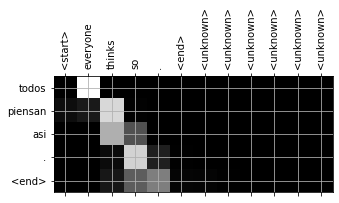

Expected: dios siempre tiene la razon .
Translation: dios es lo hecho .



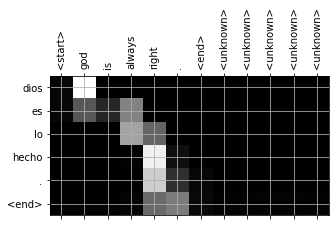

Expected: vayase .
Translation: largate !



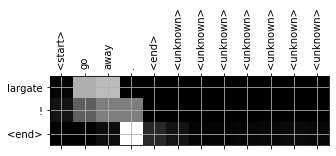

Expected: es muy amargo .
Translation: esta muy hondo .



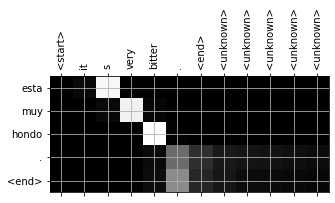

Expected: soy un traductor .
Translation: soy traductor .



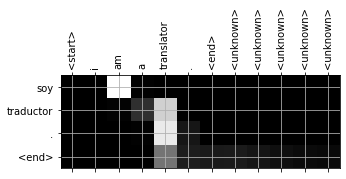

Expected: las termitas comen madera .
Translation: come a comer .



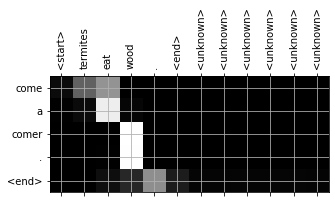

Expected: realmente recuerdo eso .
Translation: lo recuerdo .



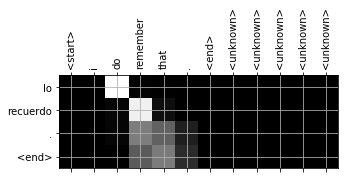

Expected: te llamare .
Translation: te llamo .



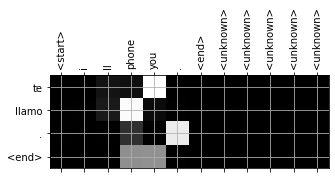

Expected: nos encontramos hoy .
Translation: nos vimos hoy .



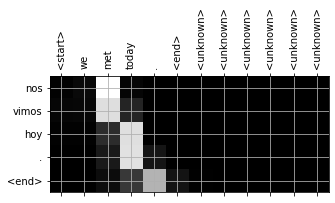

Expected: ¿ como pudo ocurrir eso ?
Translation: ¿ como podria eso ?



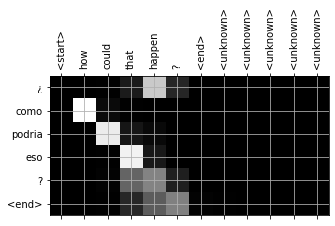

Expected: esto es solo agua .
Translation: esto es solo agua .



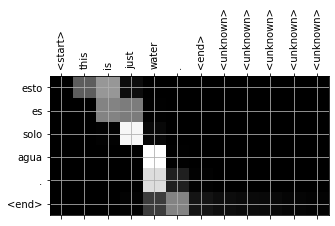

In [9]:
# Test model
translator.evaluate(test_dataset)

In [10]:
# Creating some input
source = b"I'm very happy to see you."
source = preprocess(tf.constant(source))
source = tf.strings.split(tf.constant(source))
print(source)
source = builder.source_tokenizer.encode(source.numpy())
source = tf.constant(np.pad(source, (0, builder.source_tokenizer.max_seq - len(source))),
                     shape=[1, builder.source_tokenizer.max_seq])
print(source)

tf.Tensor([b'<start>' b'i' b'm' b'very' b'happy' b'to' b'see' b'you' b'.' b'<end>'], shape=(10,), dtype=string)
tf.Tensor([[  1  18  50 947 296 256 105 106   3   4   0   0]], shape=(1, 12), dtype=int32)


estoy muy feliz verte . <end>


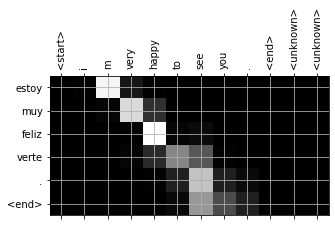

In [11]:
# Outputing model translation
prediction, attention = translator.translate(source, return_attention=True)
print(' '.join(builder.target_tokenizer.index_to_word[word].decode() for word in prediction))
plot_attention(attention, tf.squeeze(source).numpy(), prediction,
               builder.source_tokenizer.index_to_word,
               builder.target_tokenizer.index_to_word)